In [3]:
import pickle
alldata = pickle.load( open( "data_rando.p", "rb" ) )

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [5]:
import h5py as hd
pannuke= hd.File('/mnt/nas2/results/IntermediateResults/Camelyon/pannuke/patches_fix.hdf5', 'r', libver='latest', swmr=True)

In [6]:
# loop across types 
# loop across individual nuclei (with unique values)
values_ ={}
for type_ in [0,1,2,4]:
    print(type_)
    values_[type_]=[]
    for k in pannuke['pannuke/fold1'].keys():
        try:
            mask_=np.asarray(pannuke['pannuke/fold1/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
            lime_ = heatmap=alldata['fold1_{}'.format(k)][1]
            for i in np.unique(mask_):
                if i!=0:
                    #print(np.unique(lime_[mask_==i])) #we want to keep these values
                    values_[type_].append(np.unique(lime_[mask_==i])[0])
        except:
            pass
for type_ in [0,1,2,4]:
    print(type_)
    #values_[type_]=[]
    for k in pannuke['pannuke/fold2'].keys():
        try:
            mask_=np.asarray(pannuke['pannuke/fold2/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
            lime_ = heatmap=alldata['fold2_{}'.format(k)][1]
            for i in np.unique(mask_):
                if i!=0:
                    #print(np.unique(lime_[mask_==i])) #we want to keep these values
                    values_[type_].append(np.unique(lime_[mask_==i])[0])
        except:
            pass

0
1
2
4
0
1
2
4


In [7]:
type_=5
print(type_)
values_[type_]=[]
for k in pannuke['pannuke/fold1'].keys():
    try:
        mask_=np.asarray(pannuke['pannuke/fold1/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
        lime_ = heatmap=alldata['fold1_{}'.format(k)][1]
        for i in np.unique(mask_):
            if i!=0:
                #print(np.unique(lime_[mask_==i])) #we want to keep these values
                #import pdb; pdb.set_trace()
                for elem in np.unique(lime_[mask_==i])[:]:
                    values_[type_].append(elem)
                
    except:
        pass
type_=5
print(type_)
#values_[type_]=[]
for k in pannuke['pannuke/fold2'].keys():
    try:
        mask_=np.asarray(pannuke['pannuke/fold2/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
        lime_ = heatmap=alldata['fold2_{}'.format(k)][1]
        for i in np.unique(mask_):
            if i!=0:
                #print(np.unique(lime_[mask_==i])) #we want to keep these values
                for elem in np.unique(lime_[mask_==i])[:]:
                    values_[type_].append(elem)
    except:
        pass

5
5


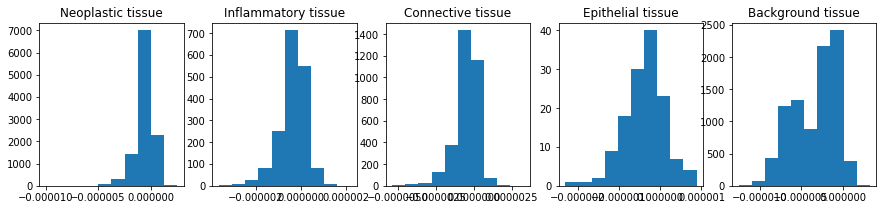

In [8]:
plt.rcParams['figure.figsize']=(15,3)
nuclei_types=['Neoplastic', 'Inflammatory', 'Connective', 'Epithelial', 'Background']
plt.figure()
i=1
for k in [0,1,2,4,5]:
    plt.subplot(1,5,i)
    plt.hist(values_[k])
    plt.title('{} tissue'.format(nuclei_types[i-1]))
    i+=1

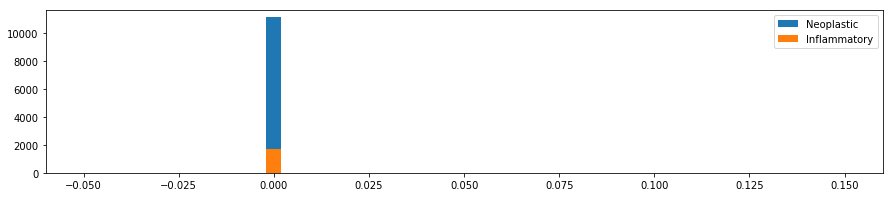

In [9]:
plt.rcParams['figure.figsize']=(15,3)
nuclei_types=['Neoplastic', 'Inflammatory', 'Connective', 'Epithelial', 'Background']
plt.figure()
i=1
for k in [0,1]:#,2,4]:#5]:
    #plt.subplot(1,5,i)
    plt.hist(values_[k][:], bins=50, range=(-0.05, 0.15) )
    #plt.title('{} tissue'.format(nuclei_types[i-1]))
    i+=1
plt.legend(nuclei_types)

In [10]:
plt.hist?

In [11]:
print("0: Neoplastic cells, 1: Inflammatory, 2: Connective/Soft tissue cells, 3: Dead Cells, 4: Epithelial, 6: Background")
for k in [0,1,2,4]:
    print('Nuclei type: {}, average values of weights (std): {} ({})'.format(k, np.mean(values_[k]), np.std(values_[k])))
k=5
print('Background, average values of weights (std): {} ({})'.format(np.mean(values_[k]), np.std(values_[k])))

0: Neoplastic cells, 1: Inflammatory, 2: Connective/Soft tissue cells, 3: Dead Cells, 4: Epithelial, 6: Background
Nuclei type: 0, average values of weights (std): -5.765260718172456e-07 (8.521087647854128e-07)
Nuclei type: 1, average values of weights (std): -3.6397670250538645e-07 (6.0275839300562e-07)
Nuclei type: 2, average values of weights (std): -4.6291814013541367e-07 (7.542479880255142e-07)
Nuclei type: 4, average values of weights (std): -3.87268997492413e-07 (4.982171963245963e-07)
Background, average values of weights (std): -3.3568995961457157e-06 (2.6452376890973486e-06)


([<matplotlib.axis.XTick at 0x7fa021b463c8>,
 <a list of 5 Text xticklabel objects>)

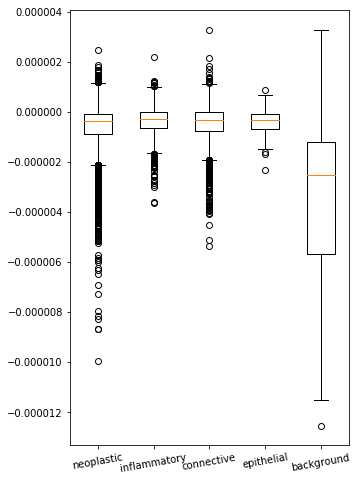

In [12]:
plt.rcParams['figure.figsize']=(5,8)
plt.figure()
#for k in range(5):
plt.boxplot([values_[k] for k in [0,1,2,4,5]], positions=np.arange(5))
#plt.title('Nuclei type: {}'.format(k))
plt.xticks(np.arange(5), ['neoplastic', 'inflammatory', 'connective', 'epithelial', 'background'], rotation=10)

In [18]:
np.save('random_val',values_)

In [14]:
# statistical testing of differences

In [15]:
import scipy.stats
print("Statistical testing of differences in mean: t-test for independent samples")
print("neoplastic-inflammatory: ", scipy.stats.ttest_ind(values_[0], values_[1])[0], scipy.stats.ttest_ind(values_[0], values_[1])[1])
print("neoplastic-connective", scipy.stats.ttest_ind(values_[0], values_[2])[0],scipy.stats.ttest_ind(values_[0], values_[2])[1])
print("neoplastic-epithelial", scipy.stats.ttest_ind(values_[0], values_[4])[0], scipy.stats.ttest_ind(values_[0], values_[4])[1])
print("neoplastic-background", scipy.stats.ttest_ind(values_[0], values_[5])[0], scipy.stats.ttest_ind(values_[0], values_[5])[1])

Statistical testing of differences in mean: t-test for independent samples
neoplastic-inflammatory:  -9.962065471675198 2.714946688936878e-23
neoplastic-connective -6.815212741731566 9.789291015090781e-12
neoplastic-epithelial -2.5750376460126296 0.010035603992025738
neoplastic-background 104.18326398278147 0.0


In [16]:
import scipy.stats
print("Statistical testing of differences in mean: t-test for independent samples, unequal variance")
print("neoplastic-inflammatory: ", scipy.stats.ttest_ind(values_[0], values_[1], equal_var=False)[0], scipy.stats.ttest_ind(values_[0], values_[1], equal_var=False)[1])
print("neoplastic-connective", scipy.stats.ttest_ind(values_[0], values_[2], equal_var=False)[0],scipy.stats.ttest_ind(values_[0], values_[2], equal_var=False)[1])
print("neoplastic-epithelial", scipy.stats.ttest_ind(values_[0], values_[4], equal_var=False)[0], scipy.stats.ttest_ind(values_[0], values_[4], equal_var=False)[1])
print("neoplastic-background", scipy.stats.ttest_ind(values_[0], values_[5], equal_var=False)[0], scipy.stats.ttest_ind(values_[0], values_[5], equal_var=False)[1])

Statistical testing of differences in mean: t-test for independent samples, unequal variance
neoplastic-inflammatory:  -12.772016977830354 2.1988860010205406e-36
neoplastic-connective -7.287522965859978 3.580559590063768e-13
neoplastic-epithelial -4.321587378157723 2.876832845561827e-05
neoplastic-background 95.44935067615242 0.0


In [17]:
import scipy.stats
print("Statistical testing of differences in mean: non-parametric Kruskal test for independent samples")
print("neoplastic-inflammatory: ", scipy.stats.kruskal(values_[0], values_[1])[0], scipy.stats.kruskal(values_[0], values_[1])[1])
print("neoplastic-connective", scipy.stats.kruskal(values_[0], values_[2])[0],scipy.stats.kruskal(values_[0], values_[2])[1])
print("neoplastic-epithelial", scipy.stats.kruskal(values_[0], values_[4])[0], scipy.stats.kruskal(values_[0], values_[4])[1])
print("neoplastic-background", scipy.stats.kruskal(values_[0], values_[5])[0], scipy.stats.kruskal(values_[0], values_[5])[1])

scipy.stats.kruskal(values_[0], values_[1])

Statistical testing of differences in mean: non-parametric Kruskal test for independent samples
neoplastic-inflammatory:  69.38085428242789 8.117280661396386e-17
neoplastic-connective 33.442297565152366 7.340992973445616e-09
neoplastic-epithelial 2.083196555482573 0.14892801387063356
neoplastic-background 7488.709812924193 0.0


KruskalResult(statistic=69.38085428242789, pvalue=8.117280661396386e-17)